In [51]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
## Reading the dataset
df=pd.read_csv('loan.csv')
df.head()

C:\Users\ritik\AppData\Local\Temp\ipykernel_21064\700581166.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [53]:
df.shape

(39717, 111)

In [54]:
## Checking for null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### As we can see there are many null values present lets remove them first.

In [55]:
df.dropna(axis=1,how='all',inplace=True)
df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### As we can see there are many single valued columns
Lets remove the cloumns which is not gonna contribute in the analysis

In [56]:
drop_list=["zip_code","url","pymnt_plan","collections_12_mths_ex_med","policy_code","initial_list_status","application_type","pub_rec_bankruptcies","tax_liens","delinq_amnt"]

In [57]:
df.drop(labels=drop_list,axis=1,inplace=True)

In [58]:
df.shape

(39717, 47)

### Further there are some column for post approval of loan and some columns have irrelevant information in it so dropping that columns too

### List of post-approval features
- delinq_2yrs
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record

In [59]:
df.drop(["id", "member_id", "title", "emp_title", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [60]:
df.shape


(39717, 22)

In [61]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'acc_now_delinq'],
      dtype='object')

In [62]:
## Removing % from int_rate column 
# df.int_rate=df.int_rate.apply(lambda x: x.replace('%',''))
df.int_rate = pd.to_numeric(df.int_rate.apply(lambda x : x.split('%')[0]))

In [63]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,acc_now_delinq
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,0
4,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,...,Current,other,17.94,Jan-96,0,15,0,53.90%,38,0


### The goal of the analysis is to predicted the default which can be done in case of Fully Paid or Charged off loans.

- So there is no case of current loan to add up in the analysis 
- Therefore droping entries with current loan status

In [64]:
df=df[~(df["loan_status"]=='Current')]
df.shape

(38577, 22)

In [65]:
df.isnull().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
acc_now_delinq            0
dtype: int64

In [66]:
### Handling missing values for emp_length
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  float64
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [67]:
print("Mode : " + df.emp_length.mode()[0])
df.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

### As we can see the mode frequency is much higher than next most frequent value
- So we cann fill mode with the NA values

In [68]:
df.emp_length.fillna(df.emp_length.mode()[0], inplace=True)
df.emp_length.isnull().sum()

0

In [69]:
df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
df.revol_util.isna().sum()

0

In [70]:
# Removing % from revol_util 
df.revol_util=df.revol_util.apply(lambda x: x.replace('%',''))

In [71]:
# Removing '>' and '+' sign from emp_lenthg
df.emp_length=df.emp_length.apply(lambda x: x.replace('>',''))
df.emp_length=df.emp_length.apply(lambda x: x.replace('<',''))
df.emp_length=df.emp_length.apply(lambda x: x.replace('years',''))
df.emp_length=df.emp_length.apply(lambda x: x.replace('year',''))
df.emp_length=df.emp_length.apply(lambda x: x.replace('+',''))

## Outlier Treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe36ba1ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe36b9dcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe36ba4790>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe36b9a950>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe31930f10>],
 'means': []}

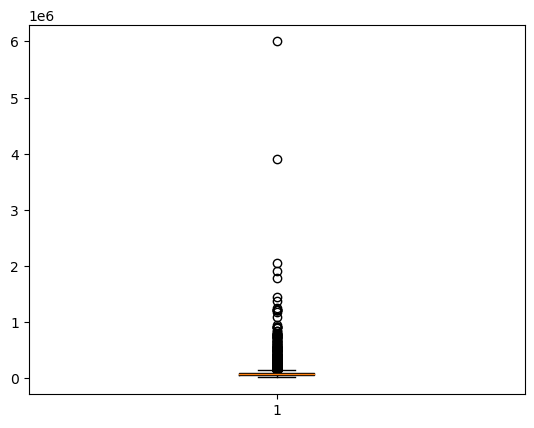

In [72]:
plt.boxplot(df.annual_inc)

### We can clearly see outliers are present
- So, Removing them.
- Let's see the quantile info and take an appropriate action.
- The values after 95 percentile seems to be disconected 


In [73]:
quantile_info = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [74]:
per_95_annual_inc = df['annual_inc'].quantile(0.95)
df = df[df.annual_inc <= per_95_annual_inc]

<Axes: >

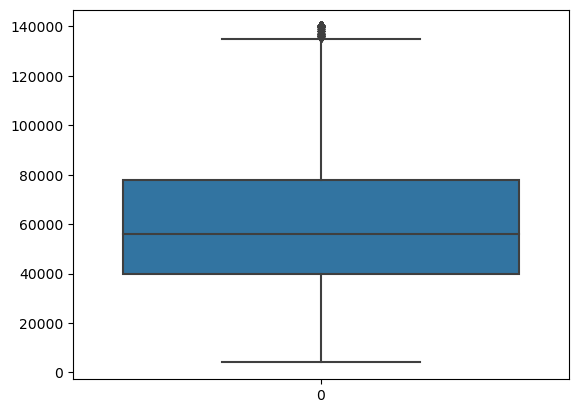

In [75]:
sns.boxplot(df.annual_inc)

### Now the data is good lets see some other numeric data that can have outliers
- dti
- loan_amnt
- funded_amnt_inv

<Axes: >

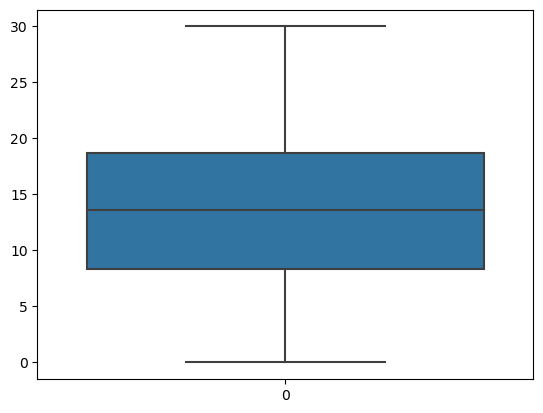

In [76]:
sns.boxplot(df.dti)

<Axes: >

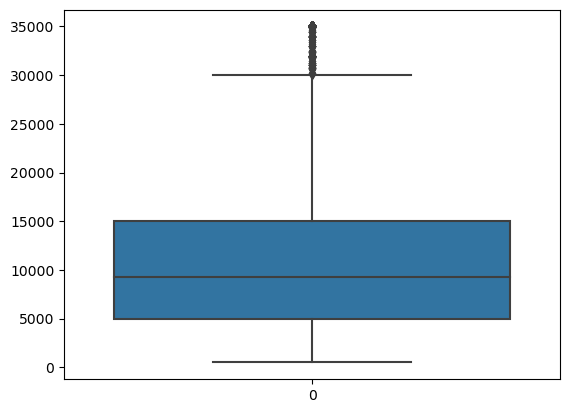

In [77]:
sns.boxplot(df.loan_amnt)

<Axes: >

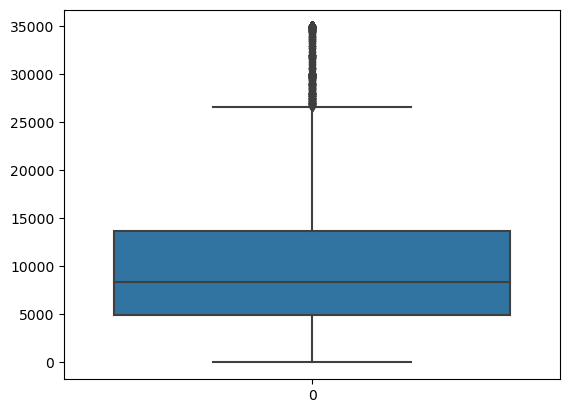

In [78]:
sns.boxplot(df.funded_amnt_inv)

 There seems some values far from distribution but the data is contineous so no need to remove the Outliers

## Visualization of Categorical Variables
### As we already have the grade cloumn so we just to need to extract the sub_grade column
- As we are anayzing defaulter data so subsetting 'Charged off' loan_status and plotting it below.

<Axes: xlabel='loan_status', ylabel='count'>

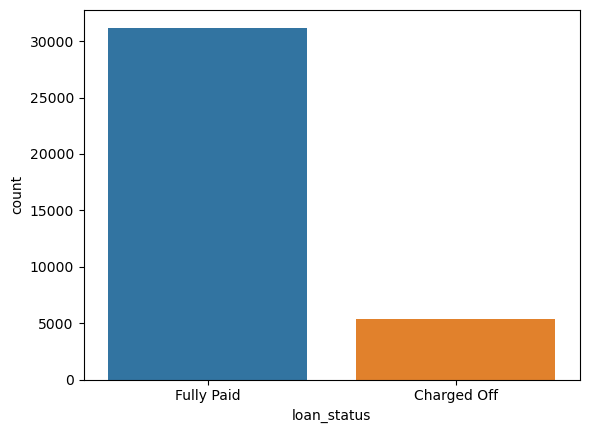

In [79]:
sns.countplot(x="loan_status",data=df)

In [80]:
df.sub_grade=pd.to_numeric(df.sub_grade.apply(lambda x: x[-1]))
df.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

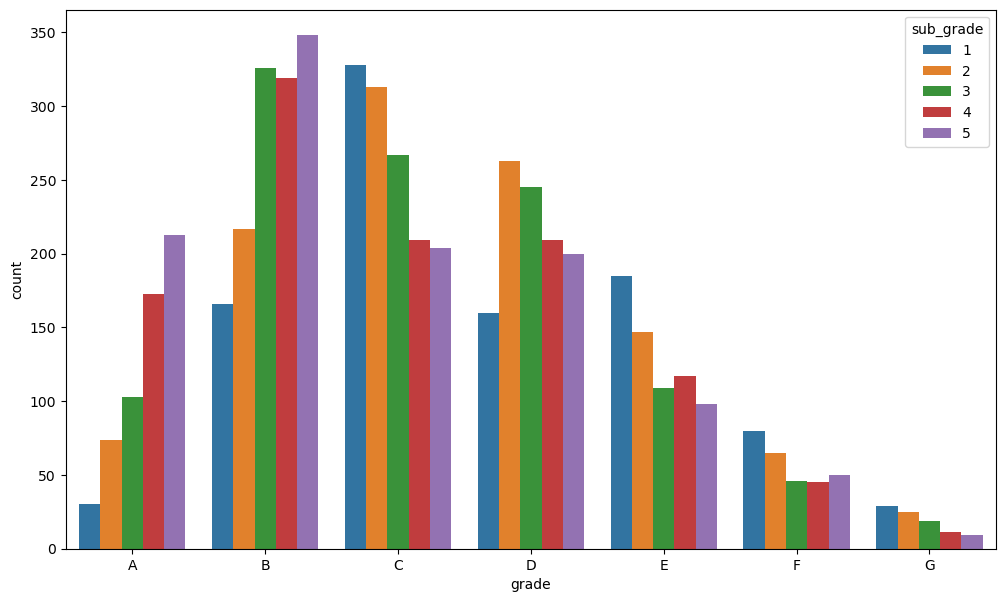

In [81]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = df[df.loan_status=="Charged Off"])

<Axes: xlabel='grade', ylabel='count'>

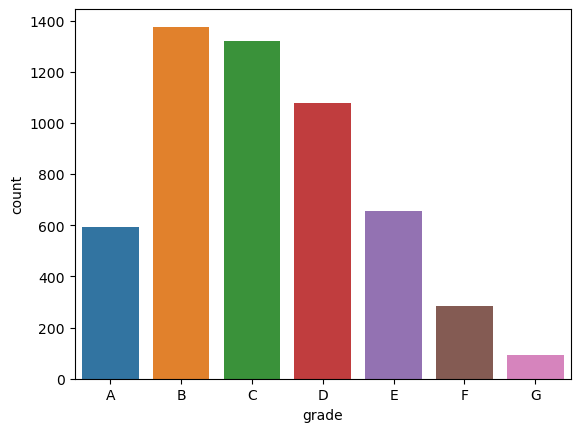

In [116]:
sns.countplot(x = 'grade', data = df[df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'],)

###  Analyzing the home_ownership

In [83]:
# Checking the unique values for home ownership
df.home_ownership.value_counts()

RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          91
NONE            3
Name: home_ownership, dtype: int64

#### There are only 3 values for NONE lets replace this values with OTHER

In [84]:
#replacing 'NONE' with 'OTHERS'
df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [85]:
# Checking unique values again
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

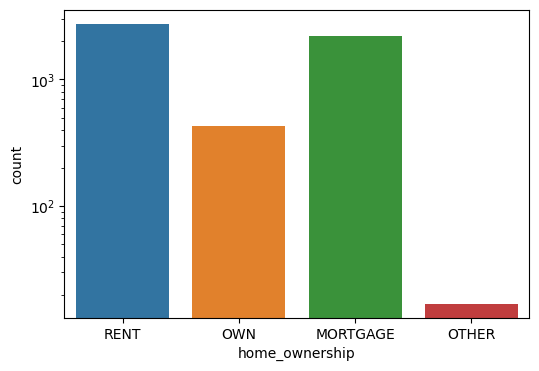

In [86]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=df[df['loan_status']=='Charged Off'])

### Analyzing 'purpose' Column

[Text(0, 0, 'car'),
 Text(1, 0, 'small_business'),
 Text(2, 0, 'other'),
 Text(3, 0, 'debt_consolidation'),
 Text(4, 0, 'major_purchase'),
 Text(5, 0, 'credit_card'),
 Text(6, 0, 'home_improvement'),
 Text(7, 0, 'moving'),
 Text(8, 0, 'vacation'),
 Text(9, 0, 'house'),
 Text(10, 0, 'medical'),
 Text(11, 0, 'wedding'),
 Text(12, 0, 'renewable_energy'),
 Text(13, 0, 'educational')]

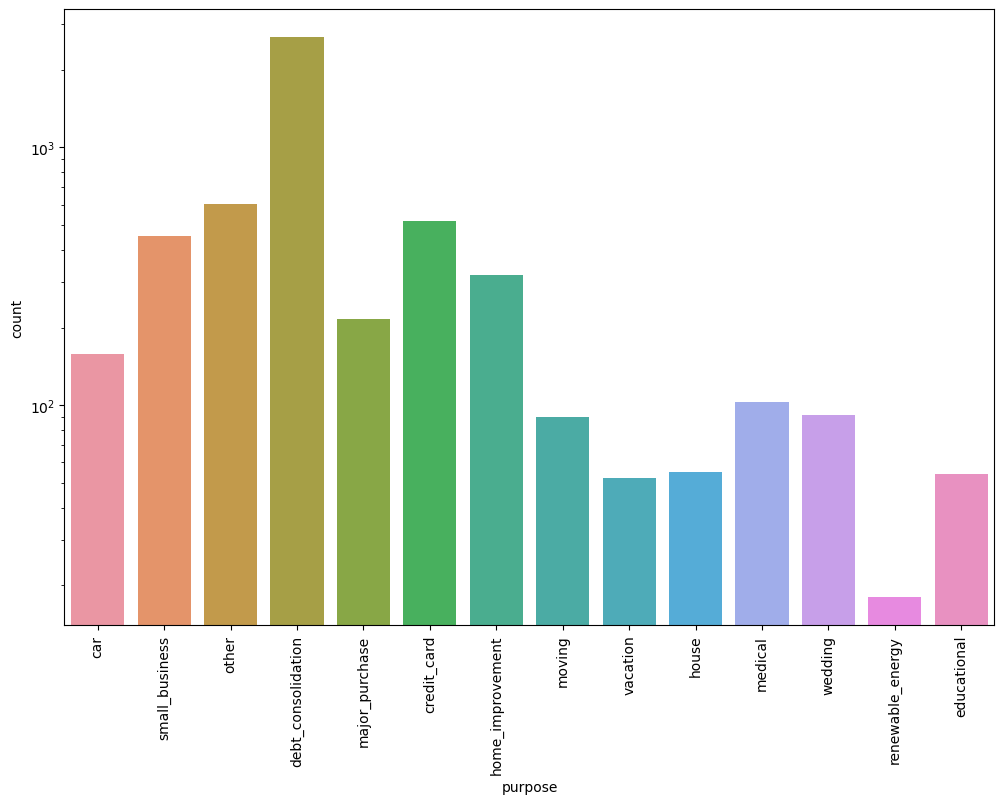

In [87]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(yscale = 'log')
plot=sns.countplot(x='purpose', data=df[df['loan_status']=='Charged Off'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

### Creating bins for some numerical values to make it categorical

In [88]:
#creating bins for int_rate,open_acc,revol_util,total_acc
df['int_rate_groups'] = pd.cut(df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
df['open_acc_groups'] = pd.cut(df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
# df['revol_util_groups'] = pd.cut(df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
df['total_acc_groups'] = pd.cut(df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [89]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,acc_now_delinq,int_rate_groups,open_acc_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.70,9,0,9%-13%,2-10,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,1,RENT,30000.0,...,5,3,0,9.40,4,0,13%-17%,2-10,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,2,0,98.50,10,0,13%-17%,2-10,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,1,10,0,21,37,0,13%-17%,2-10,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,3,9,0,28.30,12,0,5%-9%,2-10,2-20,31k-58k


### Analyzing int_rate with bins created

C:\Users\ritik\AppData\Local\Temp\ipykernel_21064\2982900463.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


<Axes: xlabel='emp_length', ylabel='count'>

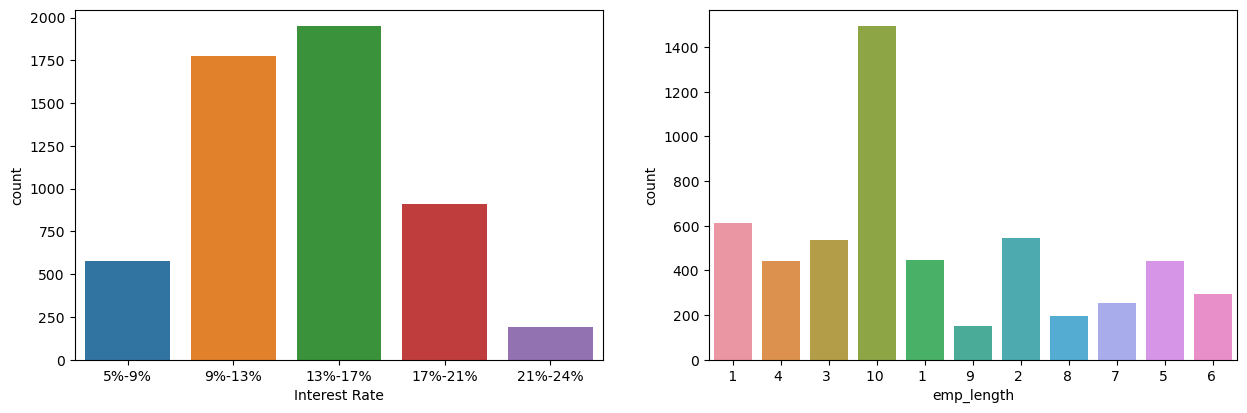

In [90]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=df[df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=df[df.loan_status == 'Charged Off'])



#### Analyzing 'open_acc_groups','total_acc_groups','annual_inc_groups' using bins created 

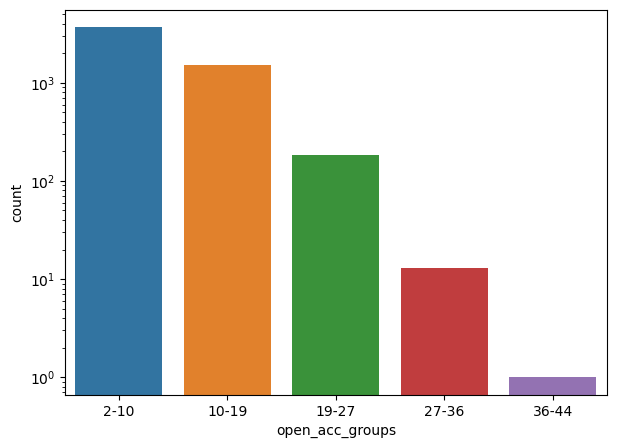

In [91]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set(yscale = 'log')
plot=sns.countplot(x='open_acc_groups', data=df[df['loan_status']=='Charged Off'])

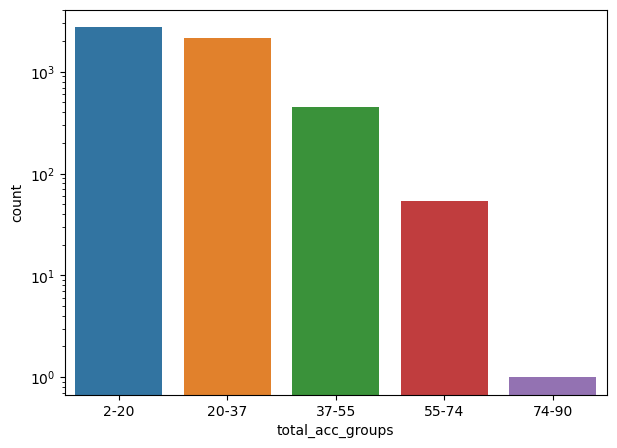

In [92]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set(yscale = 'log')
plot=sns.countplot(x='total_acc_groups', data=df[df['loan_status']=='Charged Off'])

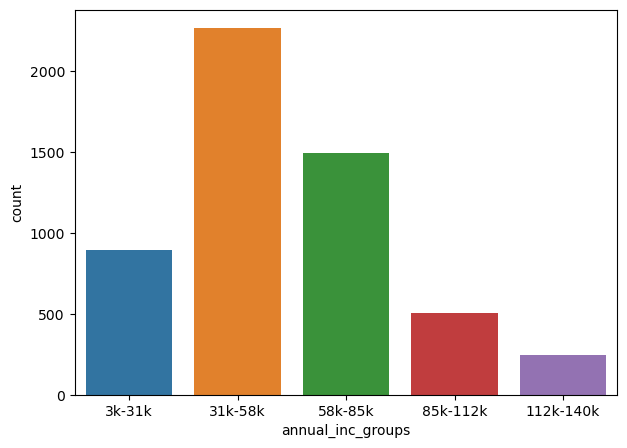

In [93]:
fig, ax = plt.subplots(figsize = (7,5))
plot=sns.countplot(x='annual_inc_groups', data=df[df['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='term'>

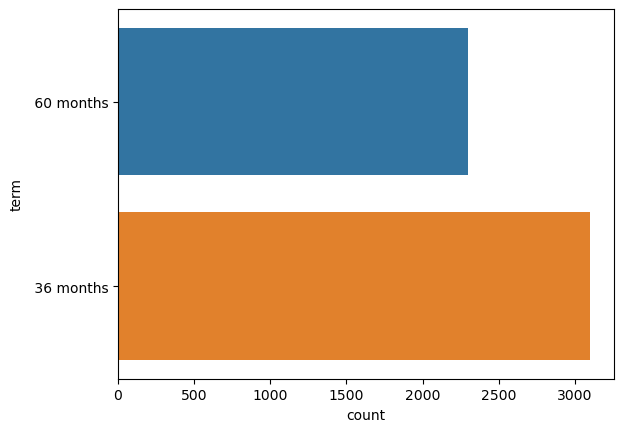

In [94]:
sns.countplot(y='term', data=df[df['loan_status']=='Charged Off'])


<Axes: xlabel='count', ylabel='verification_status'>

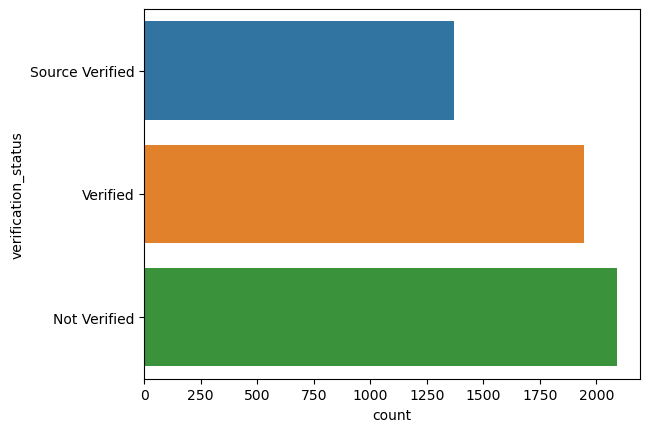

In [95]:
sns.countplot(y='verification_status', data=df[df['loan_status']=='Charged Off'])


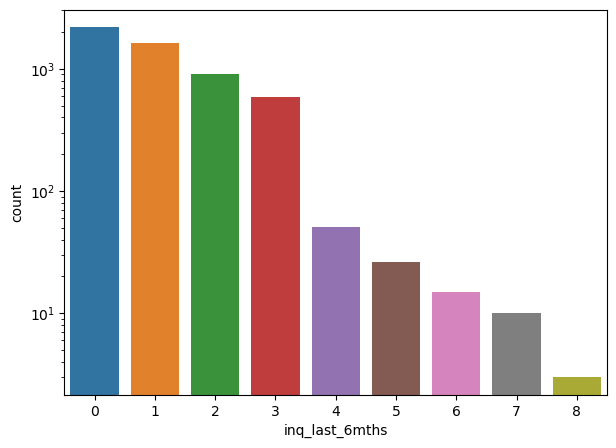

In [96]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set(yscale = 'log')
plot=sns.countplot(x='inq_last_6mths', data=df[df['loan_status']=='Charged Off'])

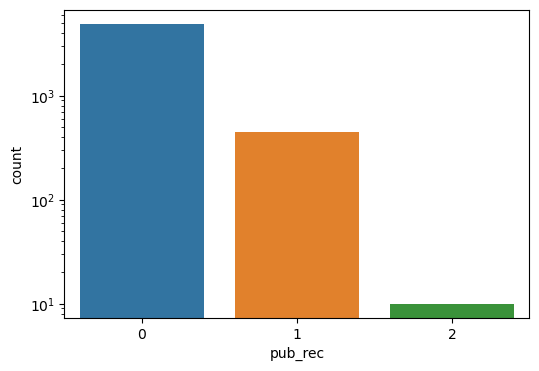

In [97]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
plot=sns.countplot(x='pub_rec', data=df[df['loan_status']=='Charged Off'])

### Analyzing by issued month and year

In [98]:
## Extracting month and year
df_month_year = df['issue_d'].str.partition("-", True)     
df['issue_month']=df_month_year[0]                       
df['issue_year']='20' + df_month_year[2]

<Axes: xlabel='issue_year', ylabel='count'>

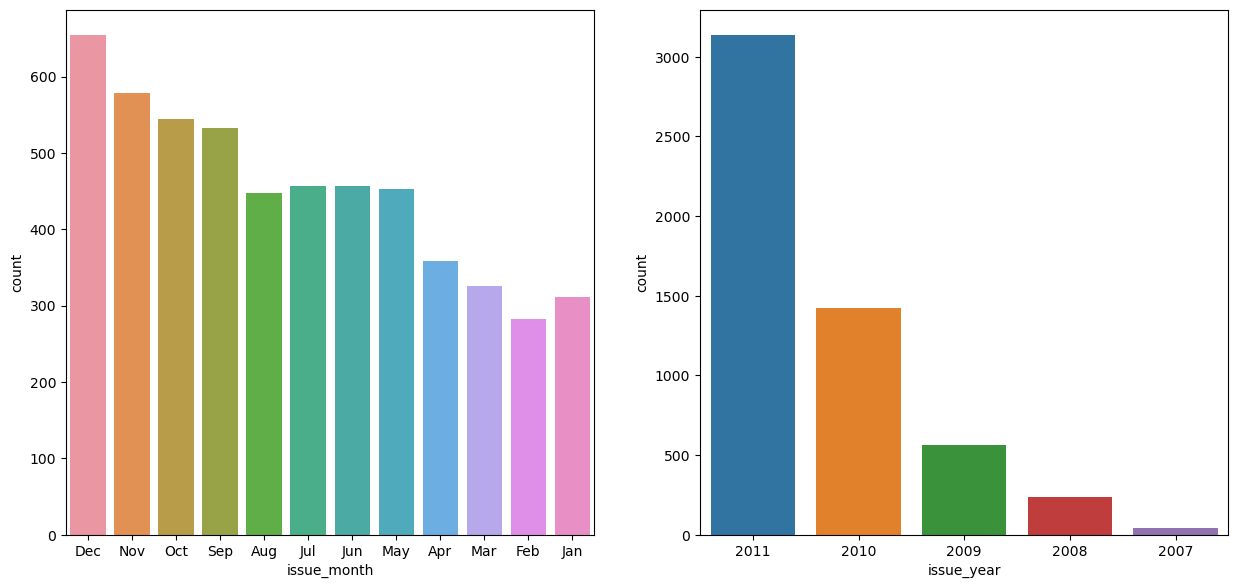

In [99]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=df[df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=df[df['loan_status']=='Charged Off'])

### The highest occurrence of defaults was observed for loans that were approved in December. Additionally, loans issued in the year 2011 exhibited a higher default rate when compared to loans issued in other years.

#### Analyzing installment,dti,loan_amnt

In [100]:
df['installment_groups'] = pd.cut(df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
df['funded_amnt_inv_group'] = pd.cut(df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
df['loan_amnt_groups'] = pd.cut(df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df['dti_groups'] = pd.cut(df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

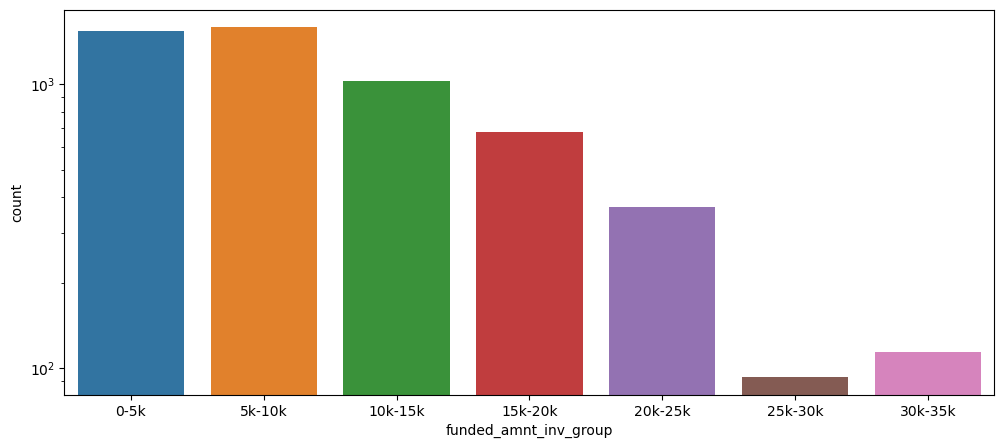

In [101]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=df[df['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

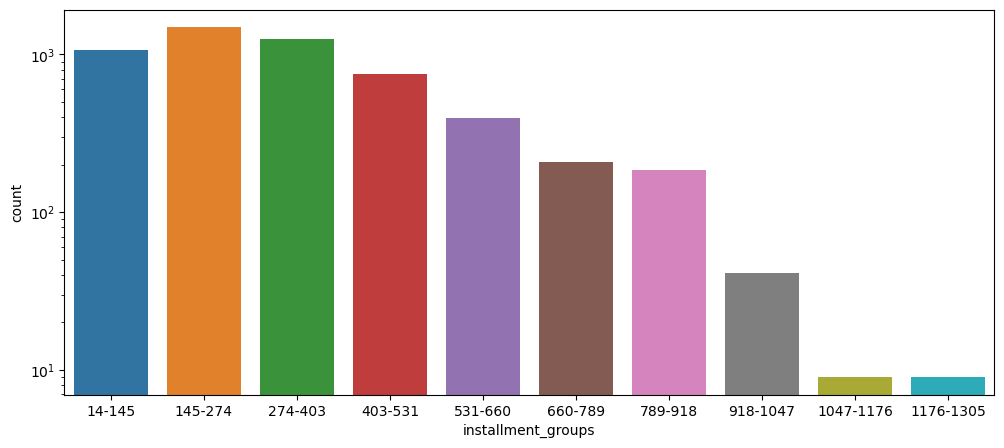

In [102]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=df[df['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

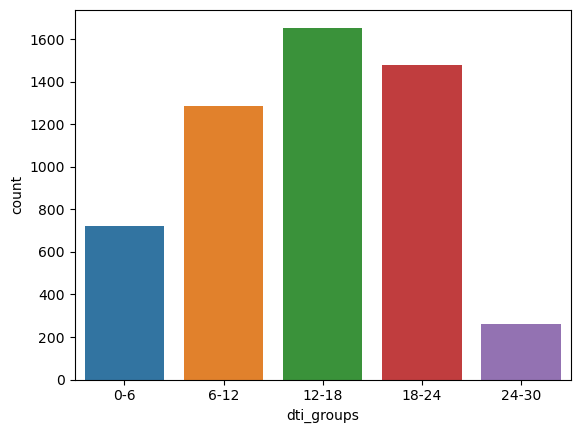

In [103]:
sns.countplot(x='dti_groups', data=df[df['loan_status']=='Charged Off'])

# Obeservations

### The preceding examination regarding charged off loans for each variable indicates the following: There is a higher likelihood of defaulting when
- When the applicant has home_ownership as 'RENT'.
- Applicant takes loan for the purpose of 'debt_consolidation'.
- Appliacnts who has open_acc 2 to 10
- Appliacnts who has total_acc 2 to 20
- Applicants who has income between 31k to 58k.
- Appliacants who has Grade B
- Applicants who has loan term as 36 Months.
- Applicants who has verification_status as 'Not verified'.
- Applicants who has number of enquires in last 6 months as 0.
- Applicants who has number of derogatory public records is 0.
- When funded amount by investor is between 5000-10000.
- Applicants who have an income of range 31201 - 58402.
- Applicants who has dti between 12-18.

## Examining yearly earnings in conjunction with additional columns for deeper insights.

#### 1. Annual income vs Loan Purpose


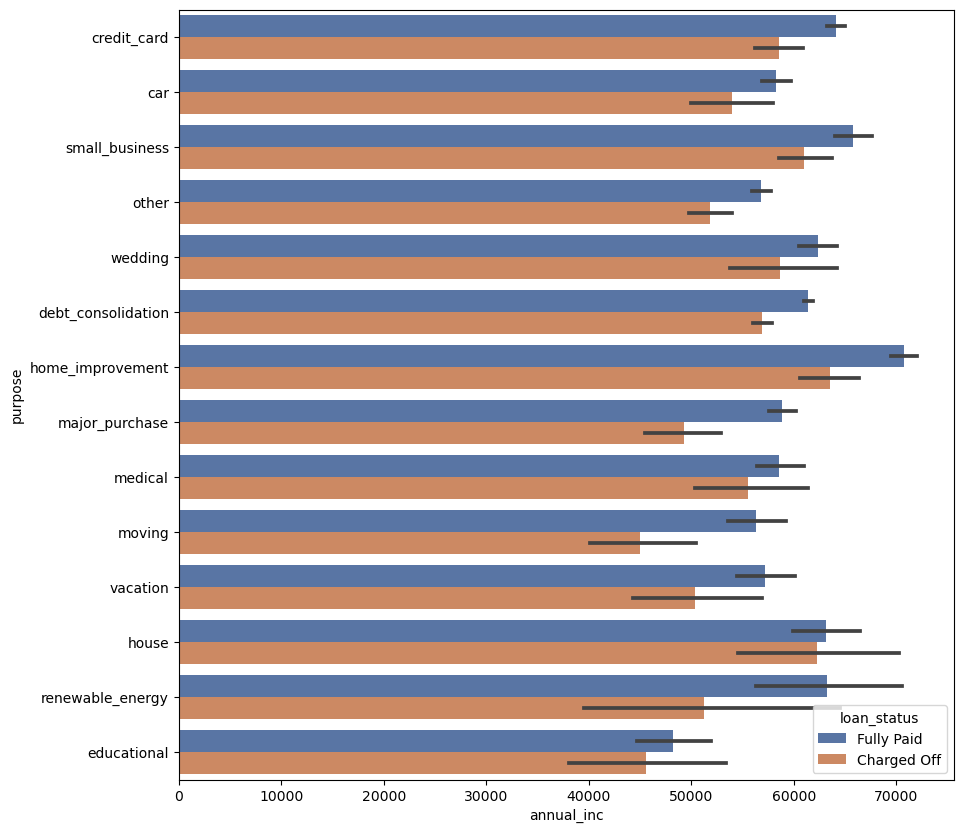

In [104]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

### While "debt consolidation" has the highest number of loan applications and defaults, it is not associated with the highest annual income among applicants.
- Individuals earning a higher income tend to seek loans primarily for purposes related to "home improvement," "housing," "renewable energy," and "small businesses."


### 2. Annual income vs home ownership

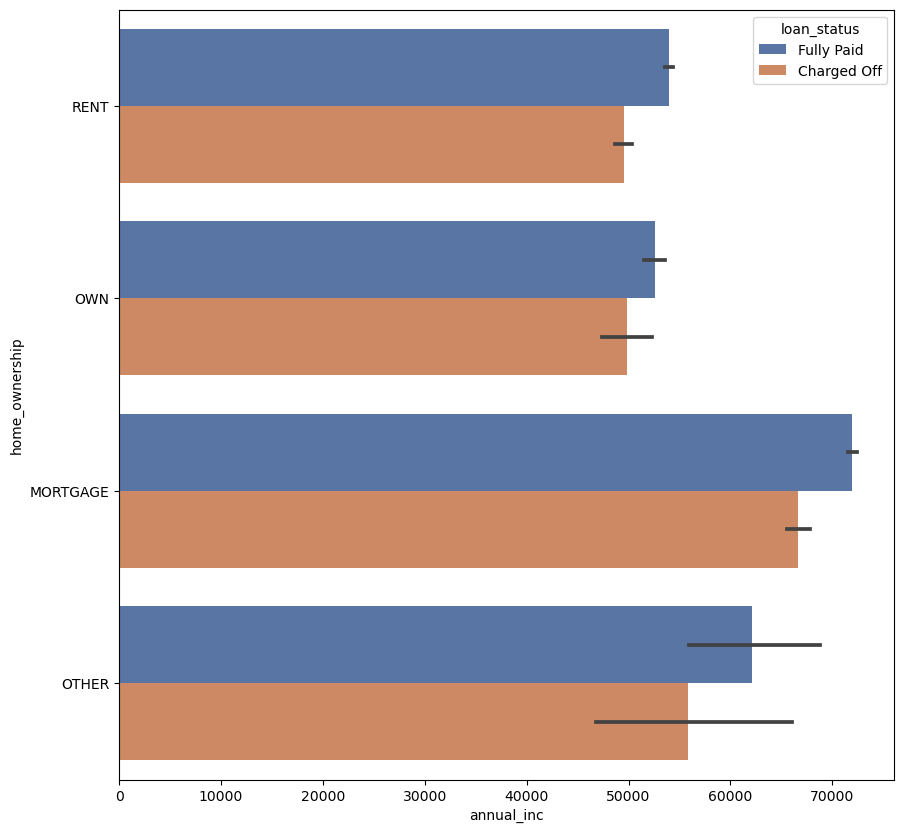

In [105]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='annual_inc', y='home_ownership', hue ='loan_status',palette="deep")
plt.show()

### 3. Annual income vs loan amount

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

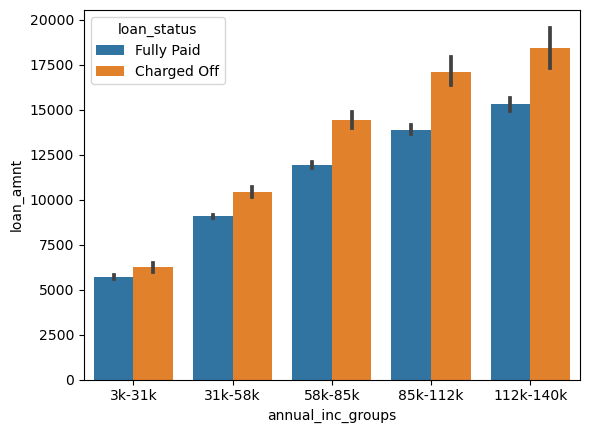

In [106]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = df)

### Among individuals in various income brackets, those who have defaulted tend to have higher loan amounts.

#### 4.Annual income vs int rate

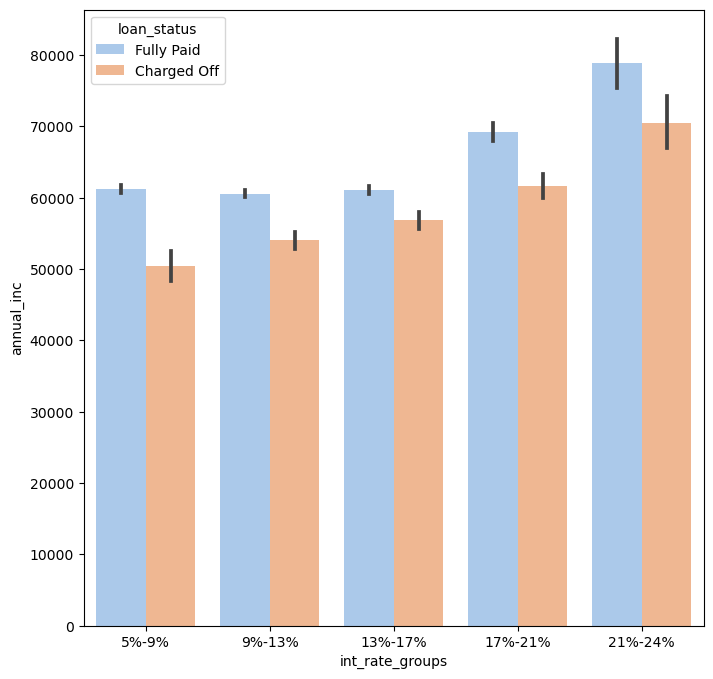

In [107]:
plt.figure(figsize=(8,8))
sns.barplot(data =df,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

## Examining the loan_amount in conjunction with other variables to gain deeper insights.

#### 1. Loan Amount vs Loan Purpose

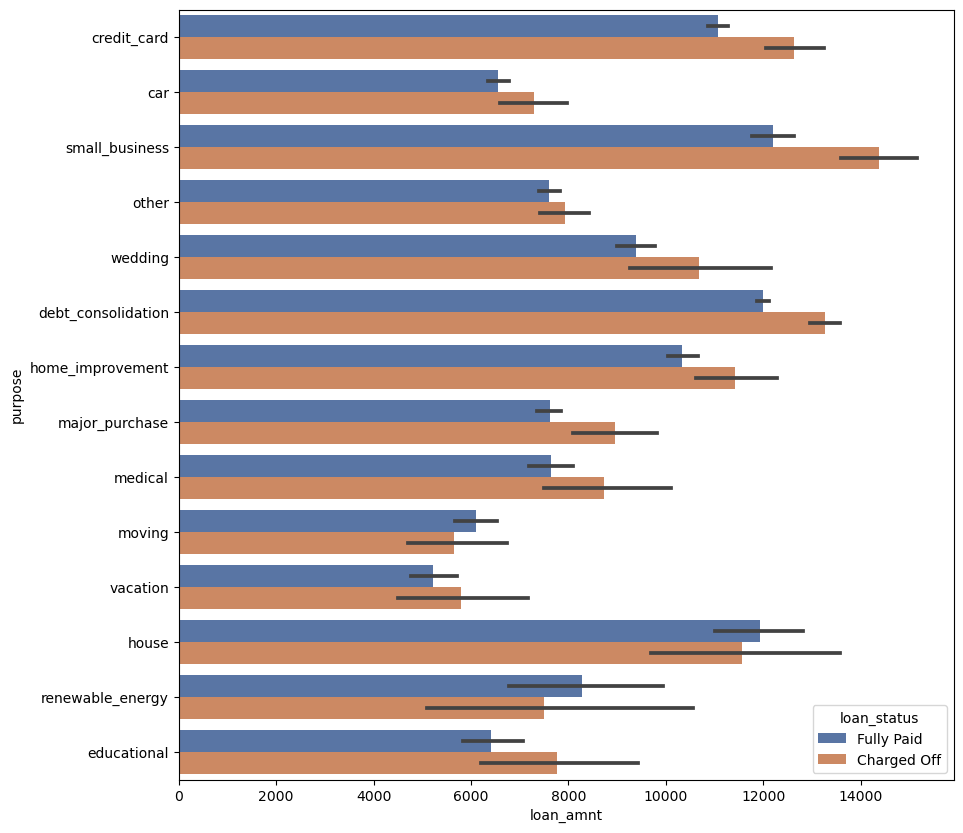

In [108]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='loan_amnt', y='purpose', hue ='loan_status',palette="deep")
plt.show()

#### 2.Loan Amount vs Home Ownership 

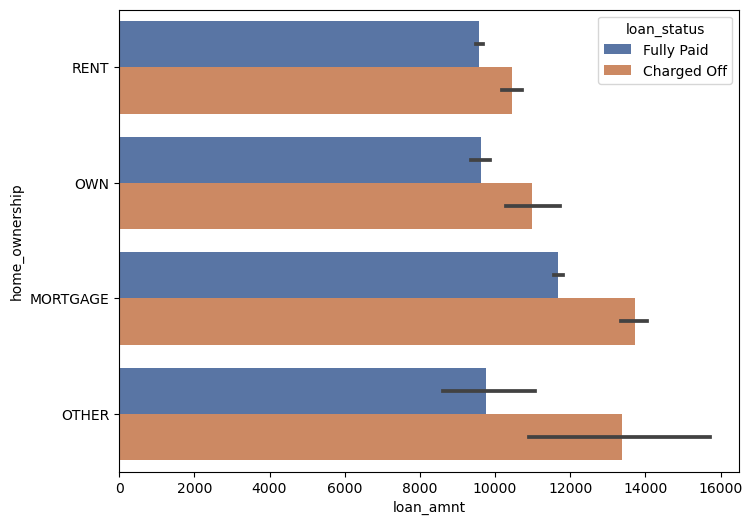

In [109]:
plt.figure(figsize=(8,6))
sns.barplot(data =df,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="deep")
plt.show()

#### 3. Loan amount vs Month issues and year issued

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

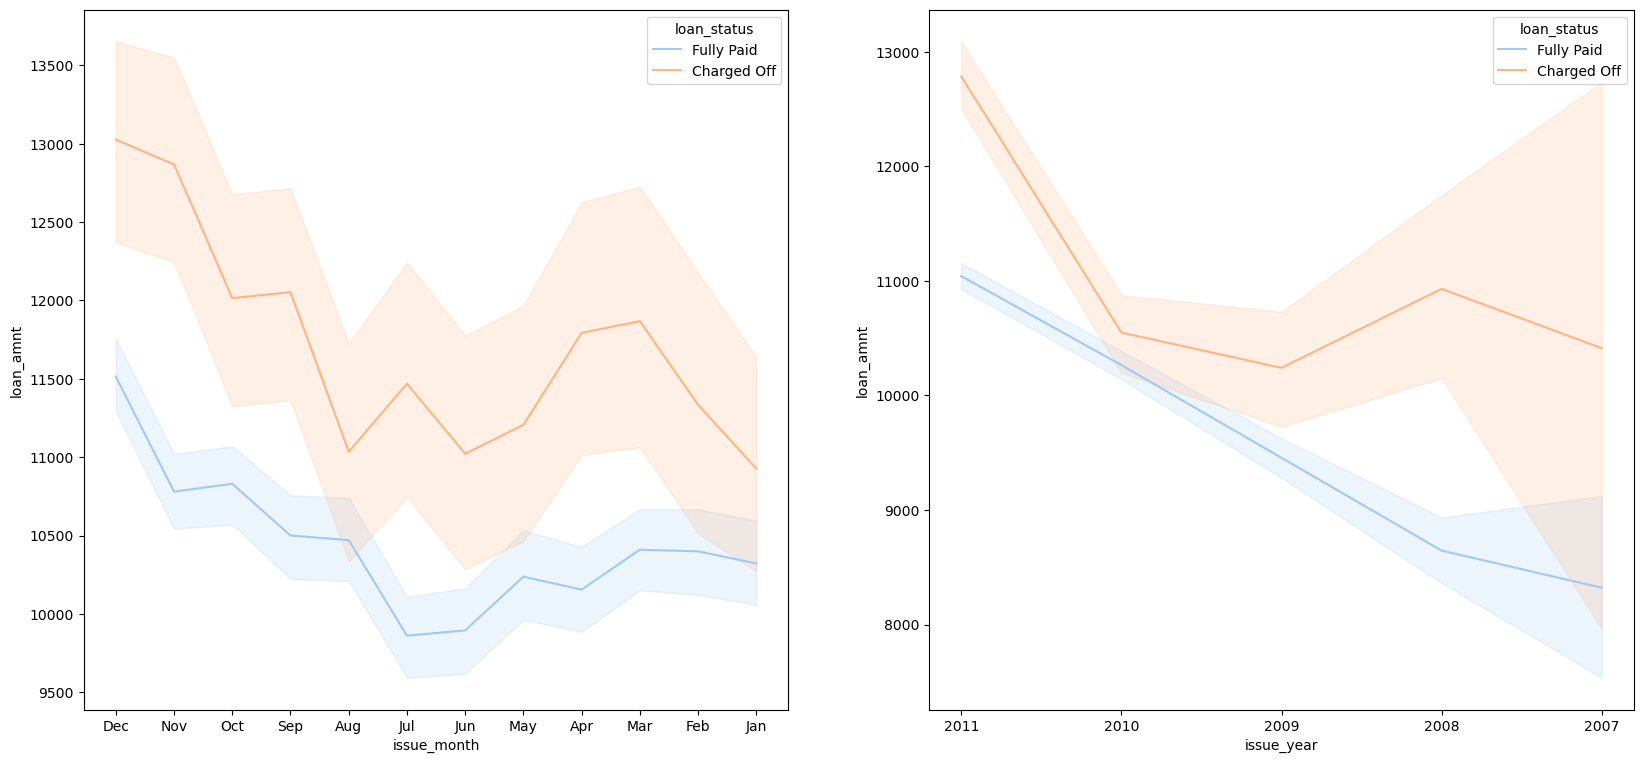

In [110]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =df,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =df,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")

#### 4.Loan Amount vs Grade

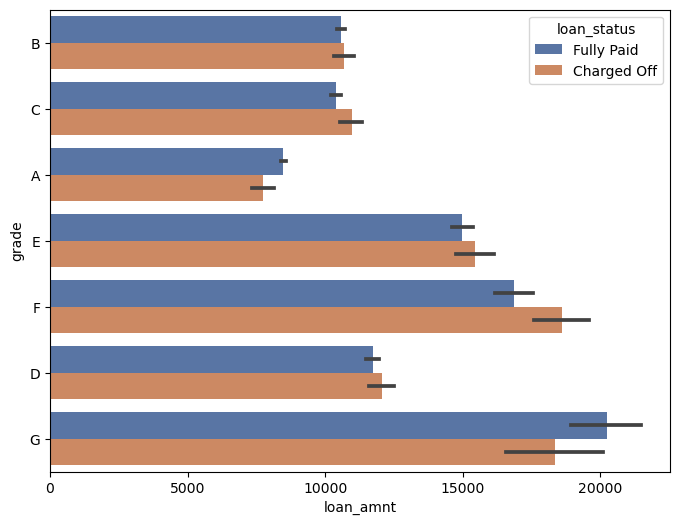

In [111]:
plt.figure(figsize=(8,6))
sns.barplot(data =df,x='loan_amnt', y='grade', hue ='loan_status',palette="deep")
plt.show()

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

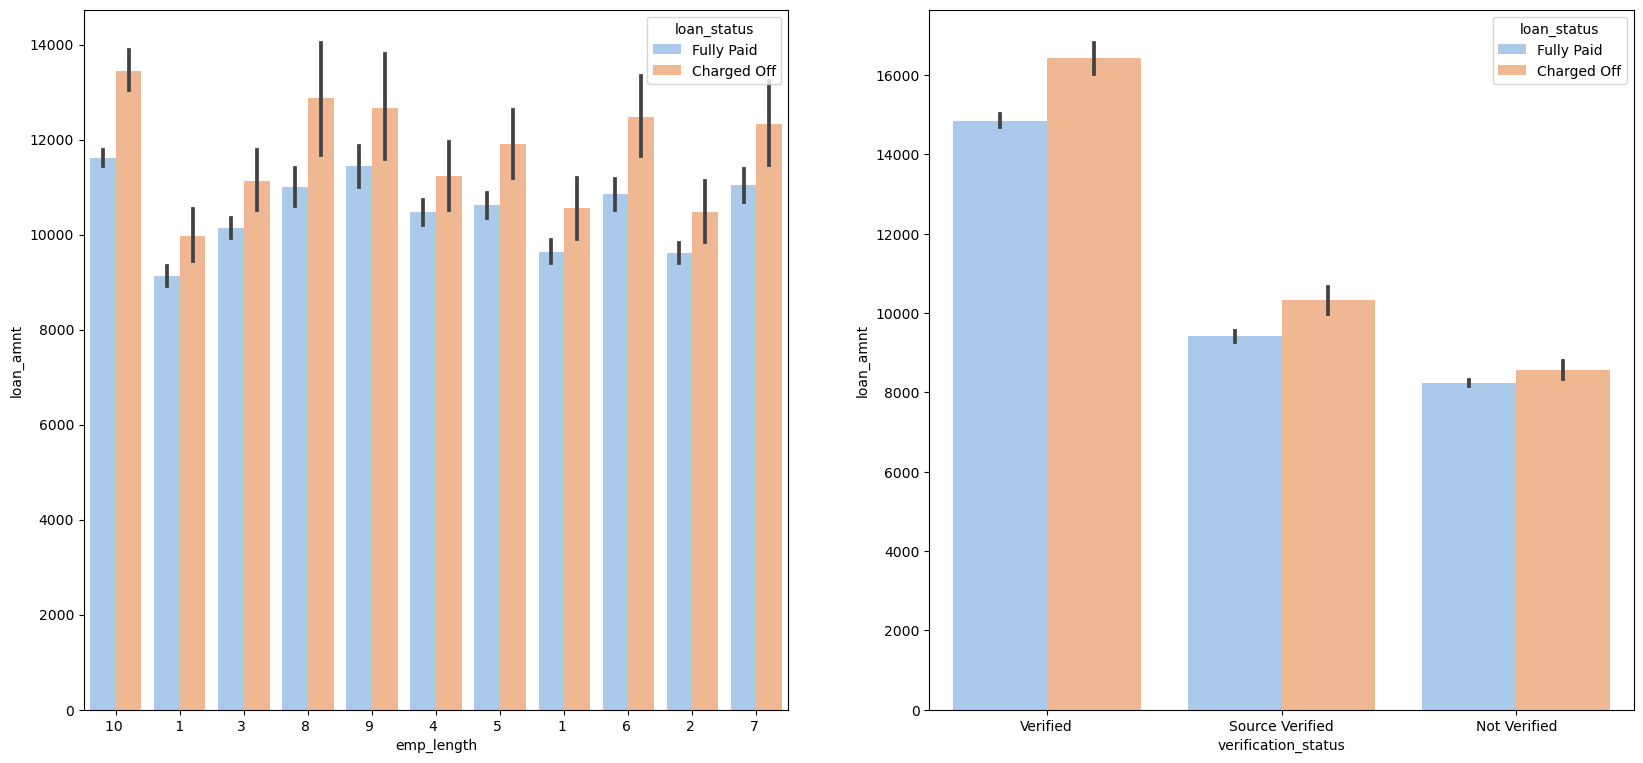

In [112]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =df,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =df,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

### Approval of loan seems higher for employess with longer work history.
- Analyzing the verification status data reveals a correlation between verified loan applications and higher loan amounts, suggesting that firms may prioritize verifying loans with greater values initially.

#### 5.Grade vs Int rate


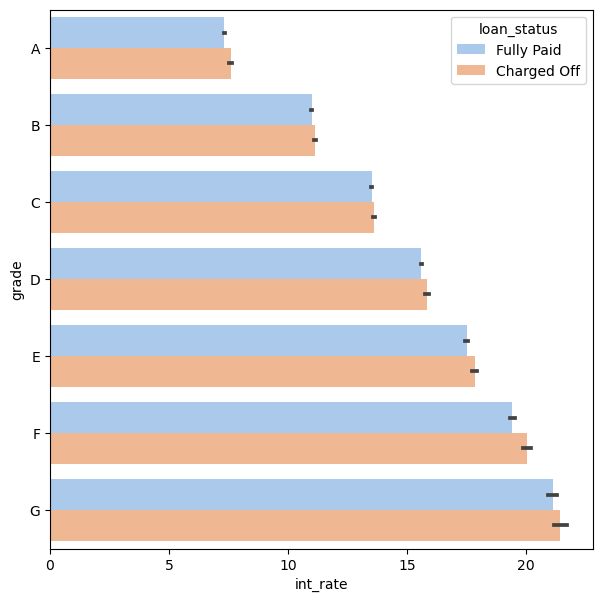

In [113]:
plt.figure(figsize=(7,7))
sns.barplot(data =df,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 640x480 with 0 Axes>

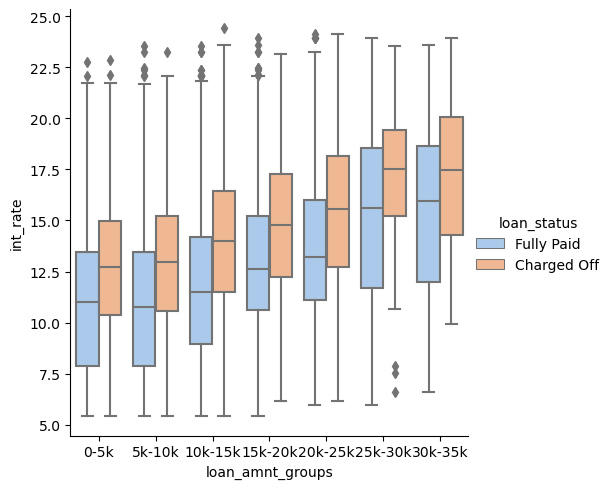

In [114]:
plt.tight_layout()
sns.catplot(data =df,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

### The interest rate on charged-off loans is considerably higher than that on fully paid loans across all loan amount categories.
- This is a important factor.

# Observations

### The preceding examination regarding charged off loans withh different variables. There is a higher likelihood of defaulting when
- Individuals seeking a loan for 'home improvement ' with an annual income in the range of 60,000 to 70,000.
- Individuals who possess a 'MORTGAGE' for their home and have an income ranging from 65k to 75k.
- Individuals with an income ranging from 70,000 to 80,000 who attract interest rates between 21% and 24%.
- Individuals who have borrowed funds for their small businesses and possess loan amounts exceeding 14k.
- Individuals who possess a 'MORTGAGE' for their home and have a loan balance ranging from 14kto 16k.
- When the grade is F and the loan amount falls within the range of 15,000 to 20,000.
- When the duration of employment spans a decade, and the loan amount falls within the range of 12,000 to 14,000.
- When the length of employment extends over ten years, and the loan amount falls between 12,000 and 14,000.
- For a grade of G and an interest rate exceeding 20%.